In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import LinearSVR

from sklearn.preprocessing import MinMaxScaler

### Fine Tuning Models

In [2]:
## AdaBoost Regressor

def adaboost_ft(X_train, y_train, X_test, y_test):
    adaboost = AdaBoostRegressor()
    param_grid = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 1.0]}
    grid = GridSearchCV(adaboost, param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mse_adaboost_ft = mean_squared_error(y_test, y_pred)

    print("Adaboost Best parameters: ", grid.best_params_)
    # print("Adaboost Mean squared error: ", round(mse, 6))
    
    return mse_adaboost_ft
    
## XGBoost Regressor

def xgb_ft(X_train, y_train, X_test, y_test):
    xgb_model = XGBRegressor()
    param_grid = {'n_estimators': [50, 100, 200],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 1.0]}
    grid = GridSearchCV(xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mse_xgb_ft = mean_squared_error(y_test, y_pred)

    print("XGBoost Best parameters: ", grid.best_params_)
    # print("XGBoost Mean squared error: ", round(mse, 6))
    
    return mse_xgb_ft
    
## Gradient Boosting Regressor 

def gb_ft(X_train, y_train, X_test, y_test):
    gb = GradientBoostingRegressor()
    param_grid = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 1.0],
                  'max_depth': [3, 5, 7]}
    grid = GridSearchCV(gb, param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mse_gb_ft = mean_squared_error(y_test, y_pred)
    
    print("Gradient Boosting Best parameters: ", grid.best_params_)
    # print("Gradient Boosting Mean squared error: ", round(mse, 6))
    
    return mse_gb_ft
    
## Bagging Regressor

def bag_ft(X_train, y_train, X_test, y_test):
    base_model = DecisionTreeRegressor()
    bagging = BaggingRegressor(base_estimator=base_model)
    param_grid = {'n_estimators': [10, 50, 100]}
    grid = GridSearchCV(bagging, param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mse_bag_ft = mean_squared_error(y_test, y_pred)

    print("Bagging Best parameters: ", grid.best_params_)
    # print("Bagging Mean squared error: ", round(mse, 3))
    
    return mse_bag_ft
    
## Random Forest Regressor

def rf_ft(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    mse_rf_ft = mean_squared_error(y_test, y_pred)
    
    print('Random Forest Best parameters:', grid_search.best_params_)
    # print('Random Forest Mean squared error:', round(mse,3))
    
    return mse_rf_ft

In [3]:
preprocessed_dataset = pd.read_csv("D:/UCF/UCF Spring 23/CAP 5610/Gorup Project/processed_data.csv")
print(preprocessed_dataset.columns.values)

preprocessed_dataset.info()

['date' 'RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             716 non-null    object 
 1   RnR_Avg          716 non-null    float64
 2   GnP_Avg          716 non-null    float64
 3   Parks_Avg        716 non-null    float64
 4   Stations_Avg     716 non-null    float64
 5   Workplace_Avg    716 non-null    float64
 6   Residential_Avg  716 non-null    float64
 7   7_day_avg_inf    716 non-null    float64
dtypes: float64(7), object(1)
memory usage: 44.9+ KB


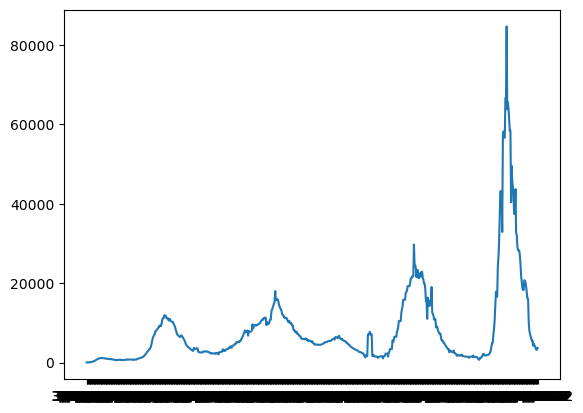

In [4]:
preprocessed_dataset["date"].shape

plt.plot(preprocessed_dataset["date"], preprocessed_dataset["7_day_avg_inf"])

<function matplotlib.pyplot.show(close=None, block=None)>

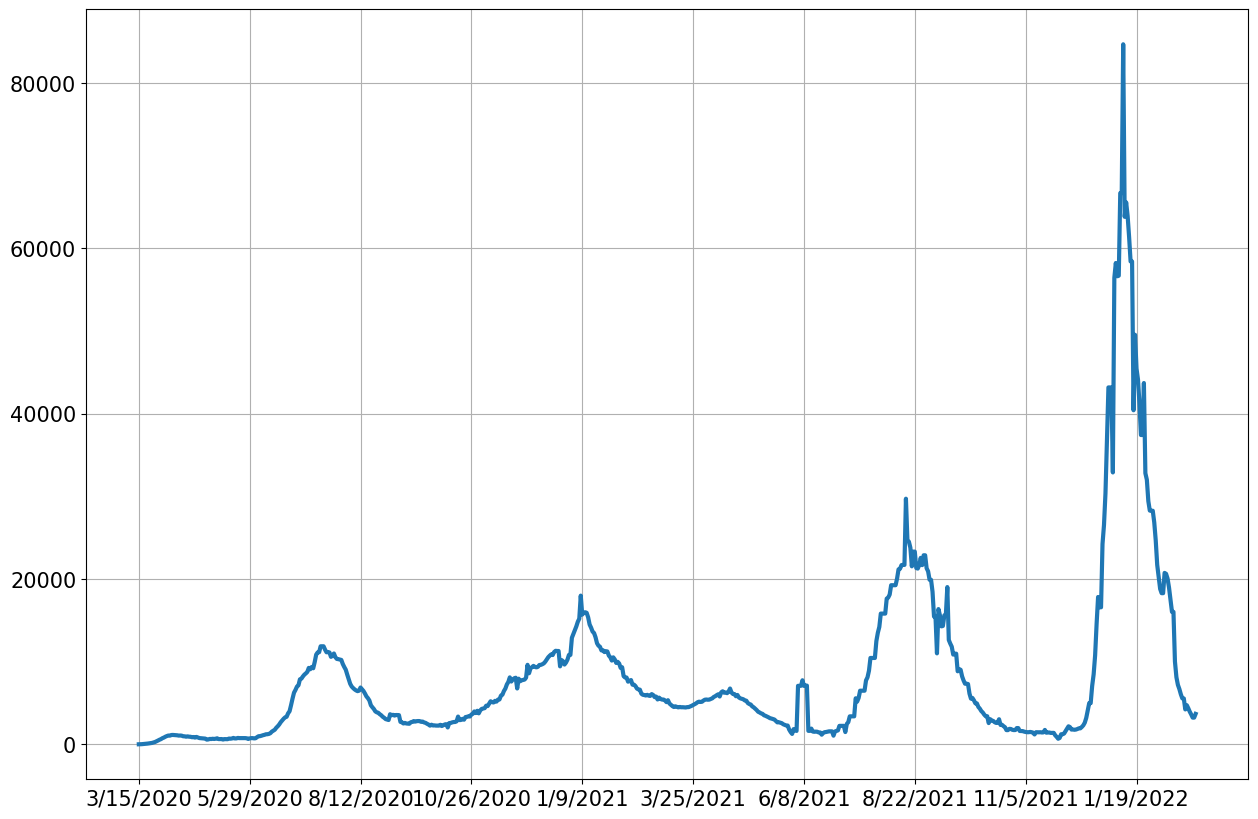

In [5]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(preprocessed_dataset["date"], preprocessed_dataset["7_day_avg_inf"], linewidth=3)
plt.xticks(range(0, 716, 75), size = 15)
plt.yticks(size = 15)
plt.grid()
plt.show

### First Wave (Initial Period) Analysis (3/15/2020 - 6/30/2020)

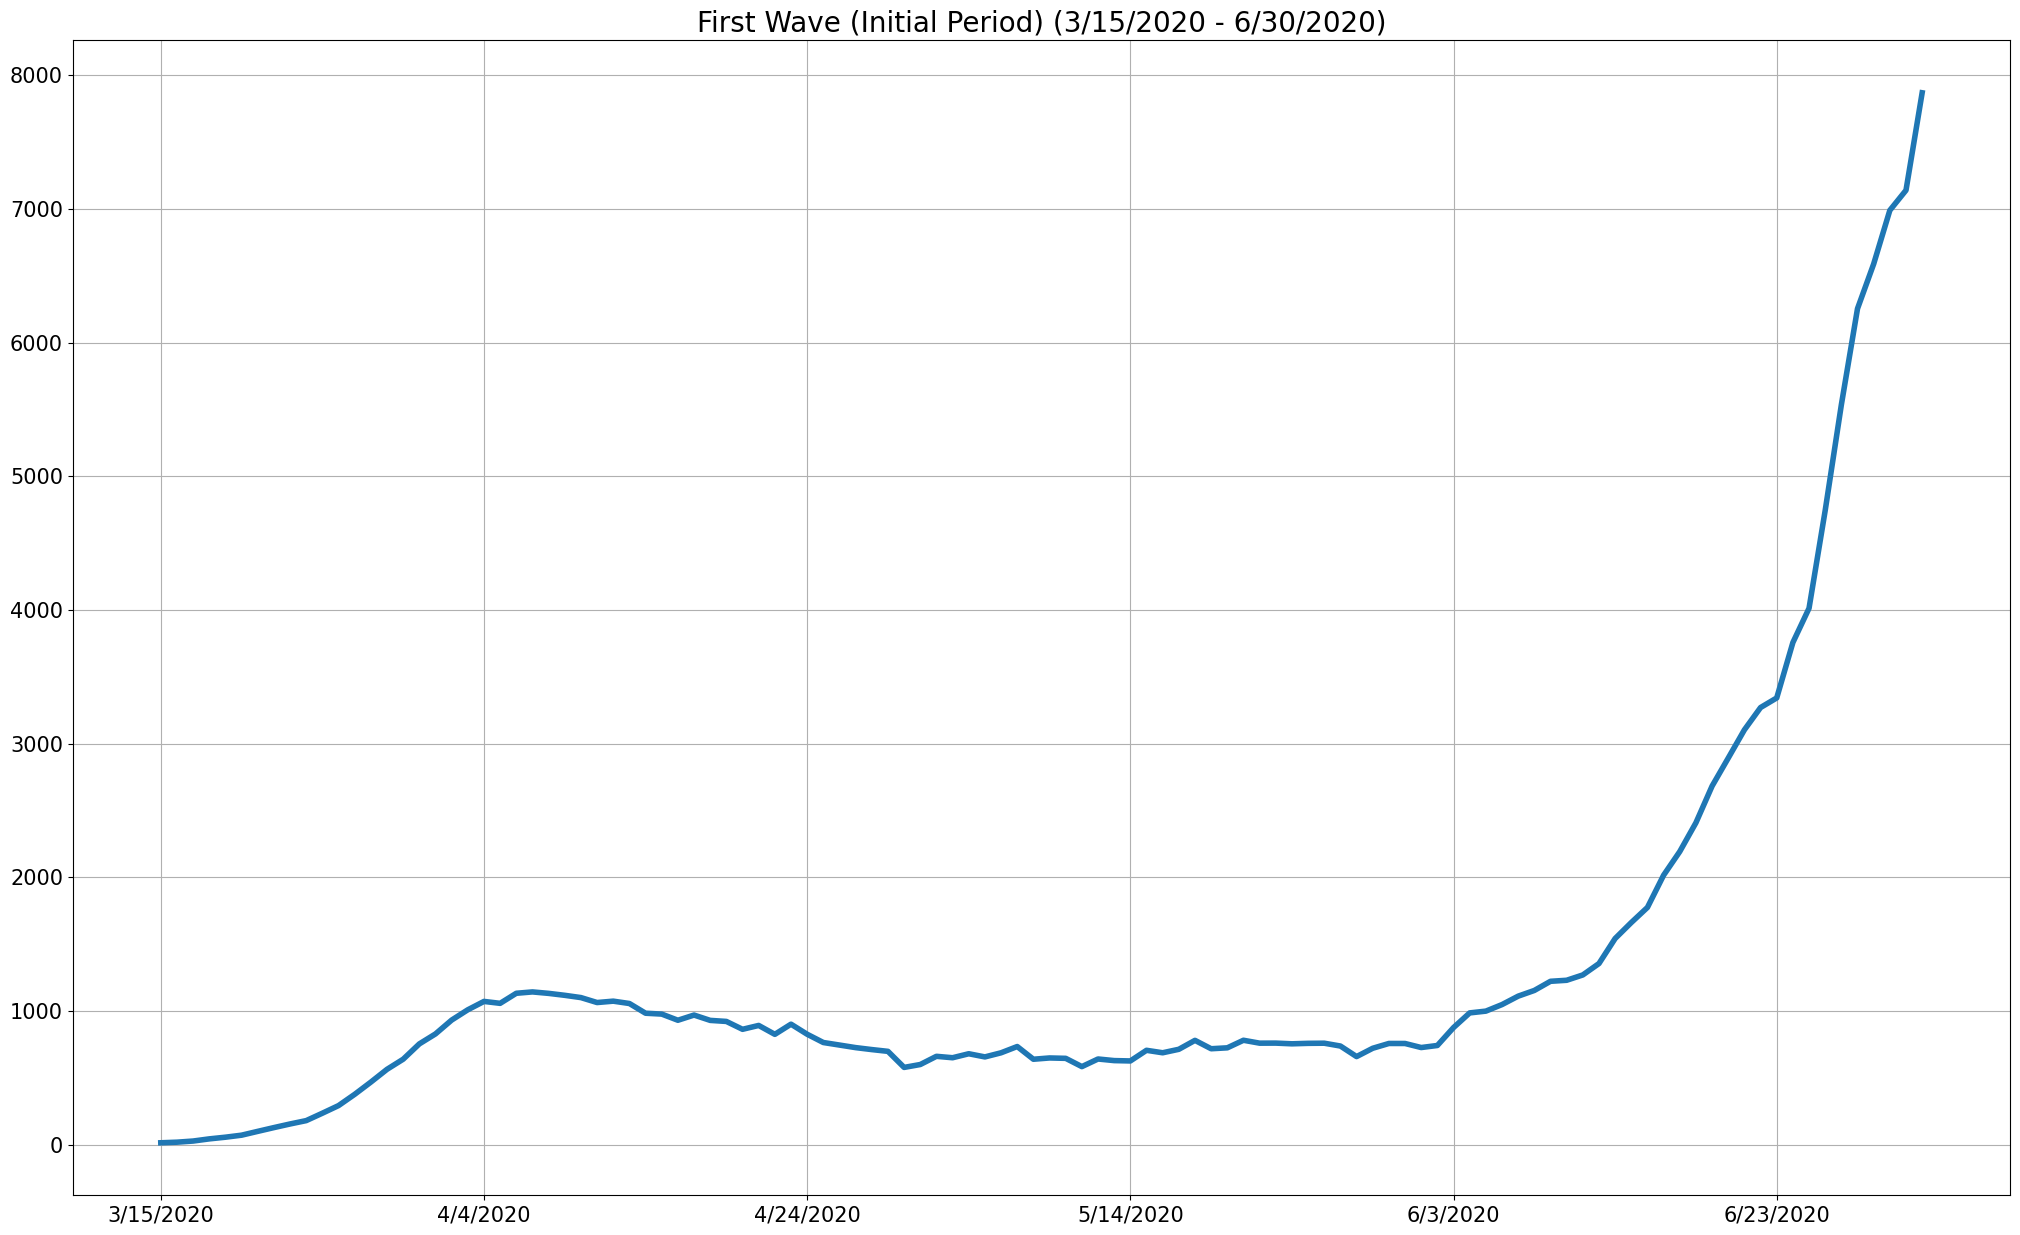

In [6]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)
first_wave = preprocessed_dataset.iloc[:110]

plt.plot(first_wave["date"], first_wave["7_day_avg_inf"], linewidth=4)
plt.xticks(range(0, 109, 20), size = 15)  # show x-axis ticks every 10 values
plt.title("First Wave (Initial Period) (3/15/2020 - 6/30/2020)", size =20)
plt.yticks(size = 15)
plt.grid()

In [7]:
print(first_wave.columns.values)

first_wave_updated = first_wave.drop('date', axis=1)

# Apply Minmax normalization to each column
scaler = MinMaxScaler()
first_wave_up_norm = pd.DataFrame(scaler.fit_transform(first_wave_updated), columns=first_wave_updated.columns)

print(first_wave_up_norm.columns.values)

features_1 = ['RnR_Avg', 'GnP_Avg', 'Parks_Avg', 'Stations_Avg', 'Workplace_Avg',
            'Residential_Avg']

target_1 = ['7_day_avg_inf']

print(first_wave_up_norm.shape)

['date' 'RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
['RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
(110, 7)


In [8]:
print(first_wave.head(5))
print(first_wave_up_norm.head(5))

        date   RnR_Avg    GnP_Avg  Parks_Avg  Stations_Avg  Workplace_Avg  \
0  3/15/2020  6.646055  12.858706  13.023454      2.697228      -0.756574   
1  3/16/2020  5.731343  14.488699  12.844350      1.750533      -3.125800   
2  3/17/2020  3.912580  15.909168  12.294243      0.646055      -5.865672   
3  3/18/2020  1.191898  16.473348  11.068230     -0.968017      -9.059701   
4  3/19/2020 -2.381663  15.901919   9.417910     -3.044776     -12.392324   

   Residential_Avg  7_day_avg_inf  
0         0.415778      13.714286  
1         0.897655      18.142857  
2         1.554371      26.714286  
3         2.430704      42.857143  
4         3.437100      55.428571  
    RnR_Avg   GnP_Avg  Parks_Avg  Stations_Avg  Workplace_Avg  \
0  1.000000  0.890395   1.000000      1.000000       1.000000   
1  0.978922  0.939820   0.996099      0.970678       0.940238   
2  0.937012  0.982893   0.984116      0.936468       0.871126   
3  0.874318  1.000000   0.957410      0.886475       0.790559

In [9]:
X_train, X_test, y_train, y_test = train_test_split(first_wave_up_norm.drop(target_1, axis=1), 
                                                    first_wave_up_norm[target_1], test_size=0.2, random_state=42)

In [10]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

mse_lr1 = mean_squared_error(y_test, lr_pred)
r2_lr1 = r2_score(y_test, lr_pred)

print('Mean squared error:', round(mse_lr1,3))
print('R-squared score:', round(r2_lr1,3))

Mean squared error: 0.014
R-squared score: 0.575


In [11]:
# Ridge Regression Model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse_ridge1 = mean_squared_error(y_test, ridge_pred)
r2_ridge1 = r2_score(y_test, ridge_pred)

print('Mean squared error:', round(mse_ridge1,3))
print('R-squared score:', round(r2_ridge1,3))

Mean squared error: 0.028
R-squared score: 0.137


In [12]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf1 = mean_squared_error(y_test, rf_pred)
r2_rf1 = r2_score(y_test, rf_pred)

print('Mean squared error:', round(mse_rf1,3))
print('R-squared score:', round(r2_rf1,3))

Mean squared error: 0.001
R-squared score: 0.969


C:\Users\asifi\AppData\Local\Temp\ipykernel_10040\1281091524.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [13]:
# Gradient Boosting Regression model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

mse_gb1 = mean_squared_error(y_test, gb_pred)
r2_gb1 = r2_score(y_test, gb_pred)

print('Mean squared error:', round(mse_gb1,3))
print('R-squared score:', round(r2_gb1,3))

Mean squared error: 0.0
R-squared score: 0.988


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# XGBoost Regression model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse_xgb1 = mean_squared_error(y_test, xgb_pred)
r2_xgb1 = r2_score(y_test, xgb_pred)

print('Mean squared error:', round(mse_xgb1,3))
print('R-squared score:', round(r2_xgb1,3))

Mean squared error: 0.0
R-squared score: 0.988


In [15]:
# Bagging Regressor
base_model = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test) 

mse_bg1 = mean_squared_error(y_test, bagging_pred)
r2_bg1 = r2_score(y_test, bagging_pred)

print('Mean squared error:', round(mse_bg1,3))
print('R-squared score:', round(r2_bg1,3))

Mean squared error: 0.001
R-squared score: 0.971


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [16]:
# AdaBoost Regressor
base_model = DecisionTreeRegressor()
adaboost = AdaBoostRegressor(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

mse_adaboost1 = mean_squared_error(y_test, adaboost_pred)
r2_adaboost1 = r2_score(y_test, adaboost_pred)

print('Mean squared error:', round(mse_adaboost1,3))
print('R-squared score:', round(r2_adaboost1,3))

Mean squared error: 0.0
R-squared score: 0.989


e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [17]:
models = pd.DataFrame({
    'Model' : ['AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regression',
               'Gradient Boosting Regression', 'Random Forest Regressor'],
    'MSE' : [mse_adaboost1, mse_bg1, mse_xgb1, mse_gb1, mse_rf1],
    })
models.sort_values(by = 'MSE', ascending=True)

,Model,MSE
0,AdaBoost Regressor,0.000364
2,XGBoost Regression,0.000379
3,Gradient Boosting Regression,0.000407
1,Bagging Regressor,0.000950
4,Random Forest Regressor,0.001012


#### First Wave Hyperparameter Tuning

In [18]:
Adaboost_fine_tuned = adaboost_ft(X_train, y_train, X_test, y_test)
XGBoost_fine_tuned = xgb_ft(X_train, y_train, X_test, y_test)
Gradient_boosting_fine_tuned = gb_ft(X_train, y_train, X_test, y_test)
Bagging_fine_tuned = bag_ft(X_train, y_train, X_test, y_test)
Random_forest_fine_tuned = rf_ft(X_train, y_train, X_test, y_test)

models_fine_tuned = pd.DataFrame({
    'Model' : ['AdaBoost Regressor_ft', 'Bagging Regressor_ft', 'XGBoost Regression_ft',
               'Gradient Boosting Regression_ft', 'Random Forest Regressor_ft'],
    'MSE' : [Adaboost_fine_tuned, Bagging_fine_tuned, XGBoost_fine_tuned, Gradient_boosting_fine_tuned, Random_forest_fine_tuned]})

print(models_fine_tuned.sort_values(by = 'MSE', ascending=True))
print(models.sort_values(by = 'MSE', ascending=True))

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Best parameters:  {'learning_rate': 1.0, 'n_estimators': 200}
XGBoost Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Gradient Boosting Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Bagging Best parameters:  {'n_estimators': 100}
Random Forest Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
                             Model       MSE
2            XGBoost Regression_ft  0.000331
3  Gradient Boosting Regression_ft  0.000416
0            AdaBoost Regressor_ft  0.001043
1             Bagging Regressor_ft  0.001579
4       Random Forest Regressor_ft  0.002603
                          Model       MSE
0            AdaBoost Regressor  0.000364
2            XGBoost Regression  0.000379
3  Gradient Boosting Regression  0.000407
1             Bagging Regressor  0.000950
4       Random Forest Regressor  0.001012


e:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


### Second Wave Analysis (7/1/2020 - 9/30/2020)

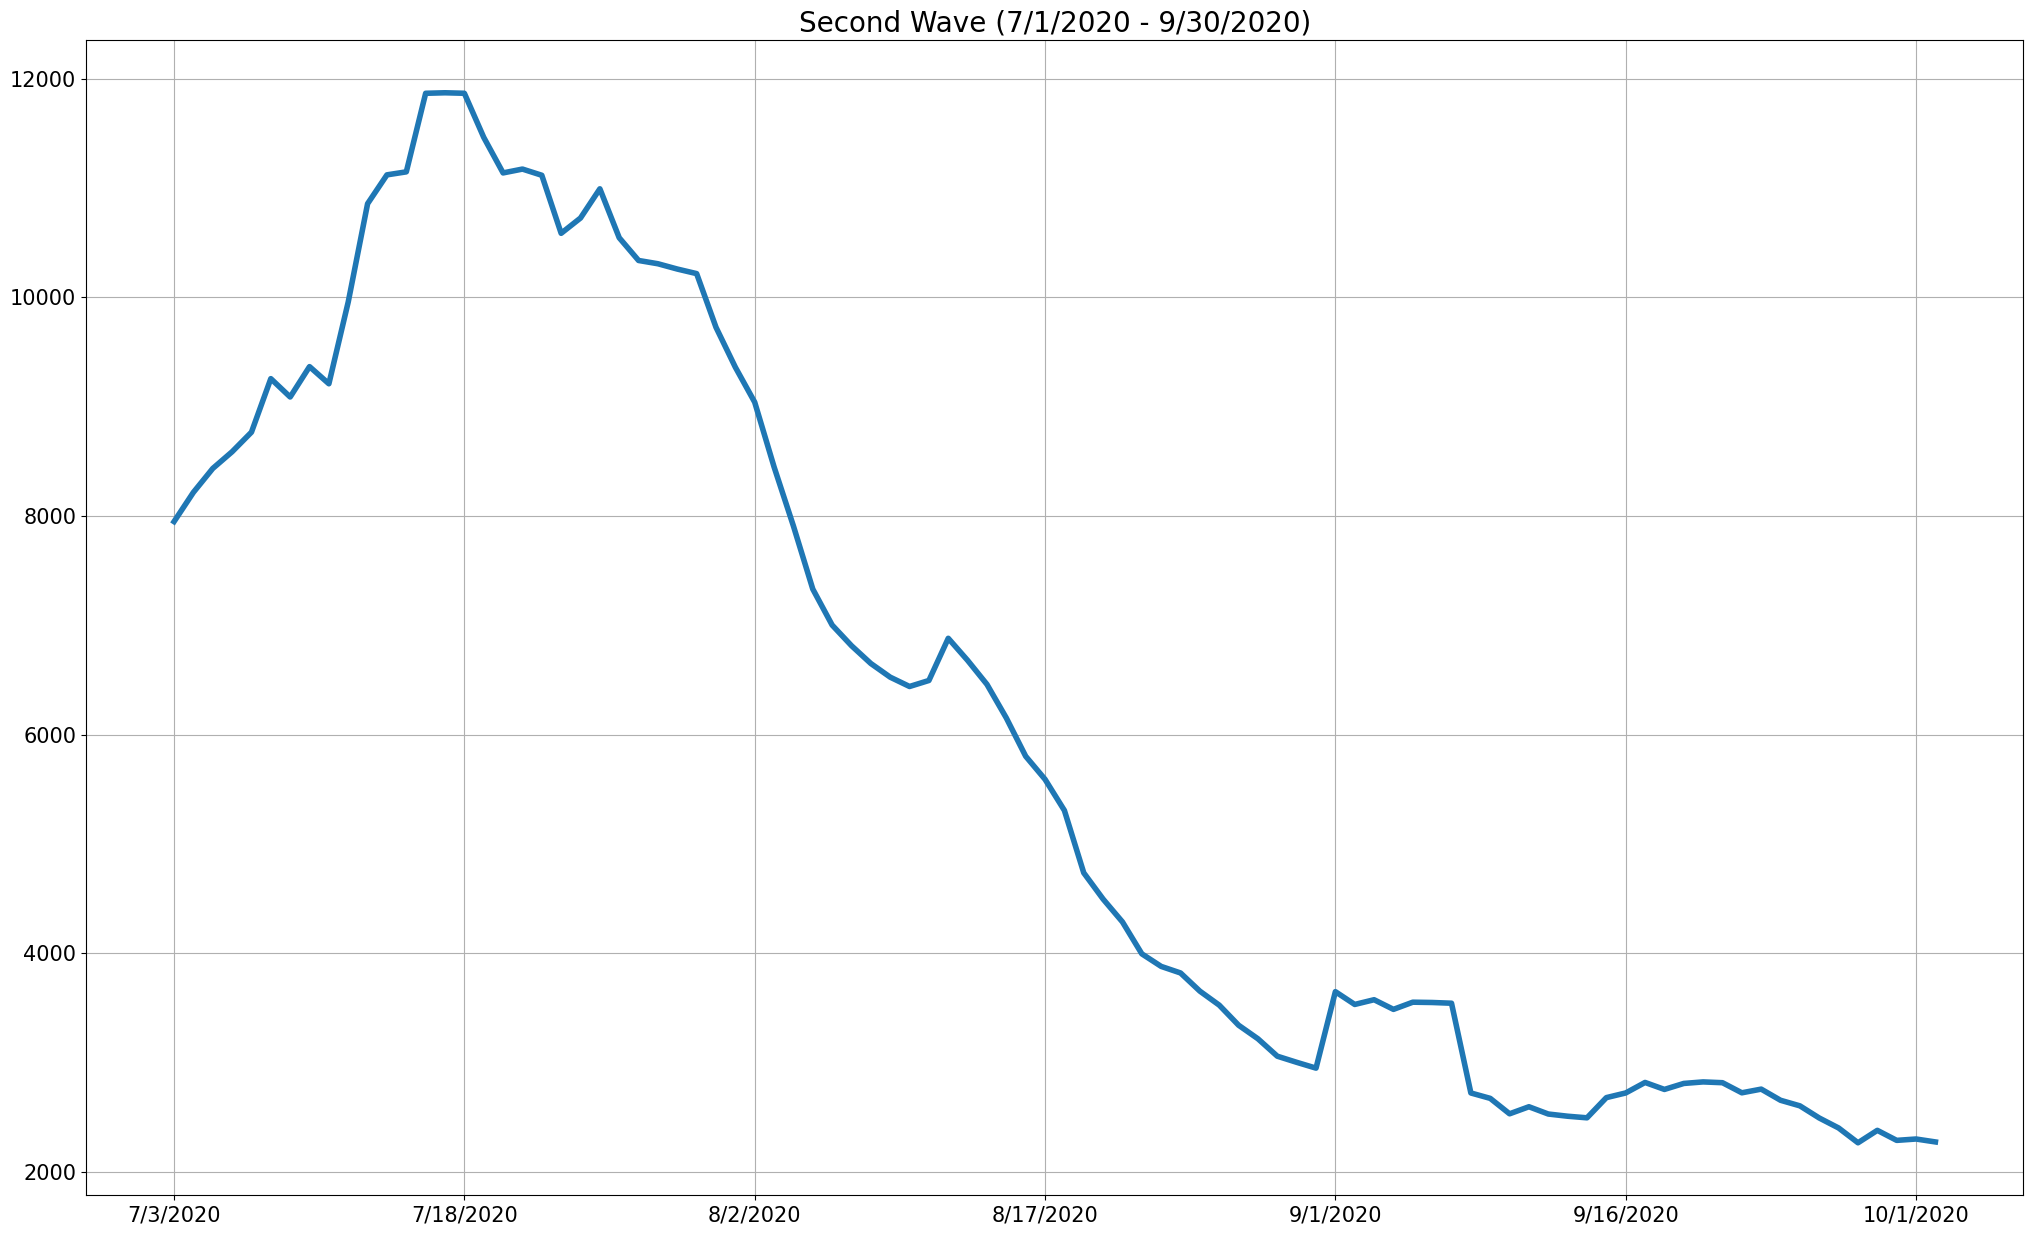

In [19]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)
second_wave = preprocessed_dataset.iloc[110:202]

plt.plot(second_wave["date"], second_wave["7_day_avg_inf"], linewidth=4)
plt.xticks(range(0, 92, 15), size = 15)  # show x-axis ticks every 10 values
plt.title("Second Wave (7/1/2020 - 9/30/2020)", size =20)
plt.yticks(size = 15)
plt.grid()

In [20]:
print(second_wave.columns.values)

second_wave_updated = second_wave.drop('date', axis=1)

# Apply Minmax normalization to each column
scaler = MinMaxScaler()
second_wave_up_norm = pd.DataFrame(scaler.fit_transform(second_wave_updated), columns=second_wave_updated.columns)

print(second_wave_up_norm.columns.values)

features_2 = ['RnR_Avg', 'GnP_Avg', 'Parks_Avg', 'Stations_Avg', 'Workplace_Avg',
            'Residential_Avg']

target_2 = ['7_day_avg_inf']

print(second_wave_up_norm.shape)

['date' 'RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
['RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
(92, 7)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(second_wave_up_norm.drop(target_2, axis=1), 
                                                    second_wave_up_norm[target_2], test_size=0.2, random_state=42)

In [22]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

mse_lr2 = mean_squared_error(y_test, lr_pred)
r2_lr2 = r2_score(y_test, lr_pred)

print('Mean squared error:', round(mse_lr2,3))
print('R-squared score:', round(r2_lr2,3))

Mean squared error: 0.006
R-squared score: 0.944


In [23]:
# Ridge Regression Model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse_ridge2 = mean_squared_error(y_test, ridge_pred)
r2_ridge2 = r2_score(y_test, ridge_pred)

print('Mean squared error:', round(mse_ridge2,3))
print('R-squared score:', round(r2_ridge2,3))

Mean squared error: 0.013
R-squared score: 0.886


In [24]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf2 = mean_squared_error(y_test, rf_pred)
r2_rf2 = r2_score(y_test, rf_pred)

print('Mean squared error:', round(mse_rf2,3))
print('R-squared score:', round(r2_rf2,3))

Mean squared error: 0.003
R-squared score: 0.975


C:\Users\asifi\AppData\Local\Temp\ipykernel_10040\3696149588.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [25]:
# Gradient Boosting Regression model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

mse_gb2 = mean_squared_error(y_test, gb_pred)
r2_gb2 = r2_score(y_test, gb_pred)

print('Mean squared error:', round(mse_gb2,3))
print('R-squared score:', round(r2_gb2,3))

Mean squared error: 0.003
R-squared score: 0.973


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# XGBoost Regression model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse_xgb2 = mean_squared_error(y_test, xgb_pred)
r2_xgb2 = r2_score(y_test, xgb_pred)

print('Mean squared error:', round(mse_xgb2,3))
print('R-squared score:', round(r2_xgb2,3))

Mean squared error: 0.004
R-squared score: 0.968


In [27]:
# Bagging Regressor
base_model = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test) 

mse_bg2 = mean_squared_error(y_test, bagging_pred)
r2_bg2 = r2_score(y_test, bagging_pred)

print('Mean squared error:', round(mse_bg2,3))
print('R-squared score:', round(r2_bg2,3))

Mean squared error: 0.003
R-squared score: 0.973


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [28]:
# AdaBoost Regressor
base_model = DecisionTreeRegressor()
adaboost = AdaBoostRegressor(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

mse_adaboost2 = mean_squared_error(y_test, adaboost_pred)
r2_adaboost2 = r2_score(y_test, adaboost_pred)

print('Mean squared error:', round(mse_adaboost2,3))
print('R-squared score:', round(r2_adaboost2,3))

Mean squared error: 0.001
R-squared score: 0.989


e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [29]:
models = pd.DataFrame({
    'Model' : ['AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regression',
               'Gradient Boosting Regression', 'Random Forest Regressor'],
    'MSE' : [mse_adaboost2, mse_bg2, mse_xgb2, mse_gb2, mse_rf2]})
models.sort_values(by = 'MSE', ascending=True)

,Model,MSE
0,AdaBoost Regressor,0.001252
4,Random Forest Regressor,0.002812
3,Gradient Boosting Regression,0.003047
1,Bagging Regressor,0.003054
2,XGBoost Regression,0.003654


#### Second Wave Parameter Hypertuning

In [30]:
Adaboost_fine_tuned = adaboost_ft(X_train, y_train, X_test, y_test)
XGBoost_fine_tuned = xgb_ft(X_train, y_train, X_test, y_test)
Gradient_boosting_fine_tuned = gb_ft(X_train, y_train, X_test, y_test)
Bagging_fine_tuned = bag_ft(X_train, y_train, X_test, y_test)
Random_forest_fine_tuned = rf_ft(X_train, y_train, X_test, y_test)

models_fine_tuned = pd.DataFrame({
    'Model' : ['AdaBoost Regressor_ft', 'Bagging Regressor_ft', 'XGBoost Regression_ft',
               'Gradient Boosting Regression_ft', 'Random Forest Regressor_ft'],
    'MSE' : [Adaboost_fine_tuned, Bagging_fine_tuned, XGBoost_fine_tuned, Gradient_boosting_fine_tuned, Random_forest_fine_tuned]})

print(models_fine_tuned.sort_values(by = 'MSE', ascending=True))
print(models.sort_values(by = 'MSE', ascending=True))

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Best parameters:  {'learning_rate': 1.0, 'n_estimators': 50}
XGBoost Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Best parameters:  {'learning_rate': 1.0, 'max_depth': 7, 'n_estimators': 100}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Best parameters:  {'n_estimators': 100}
Random Forest Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
                             Model       MSE
0            AdaBoost Regressor_ft  0.002486
2            XGBoost Regression_ft  0.002848
1             Bagging Regressor_ft  0.003277
4       Random Forest Regressor_ft  0.004251
3  Gradient Boosting Regression_ft  0.008794
                          Model       MSE
0            AdaBoost Regressor  0.001252
4       Random Forest Regressor  0.002812
3  Gradient Boosting Regression  0.003047
1             Bagging Regressor  0.003054
2            XGBoost Regression  0.003654


e:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### Third Wave Analysis - Vaccine Rollout (10/1/2020 - 7/4/2021)

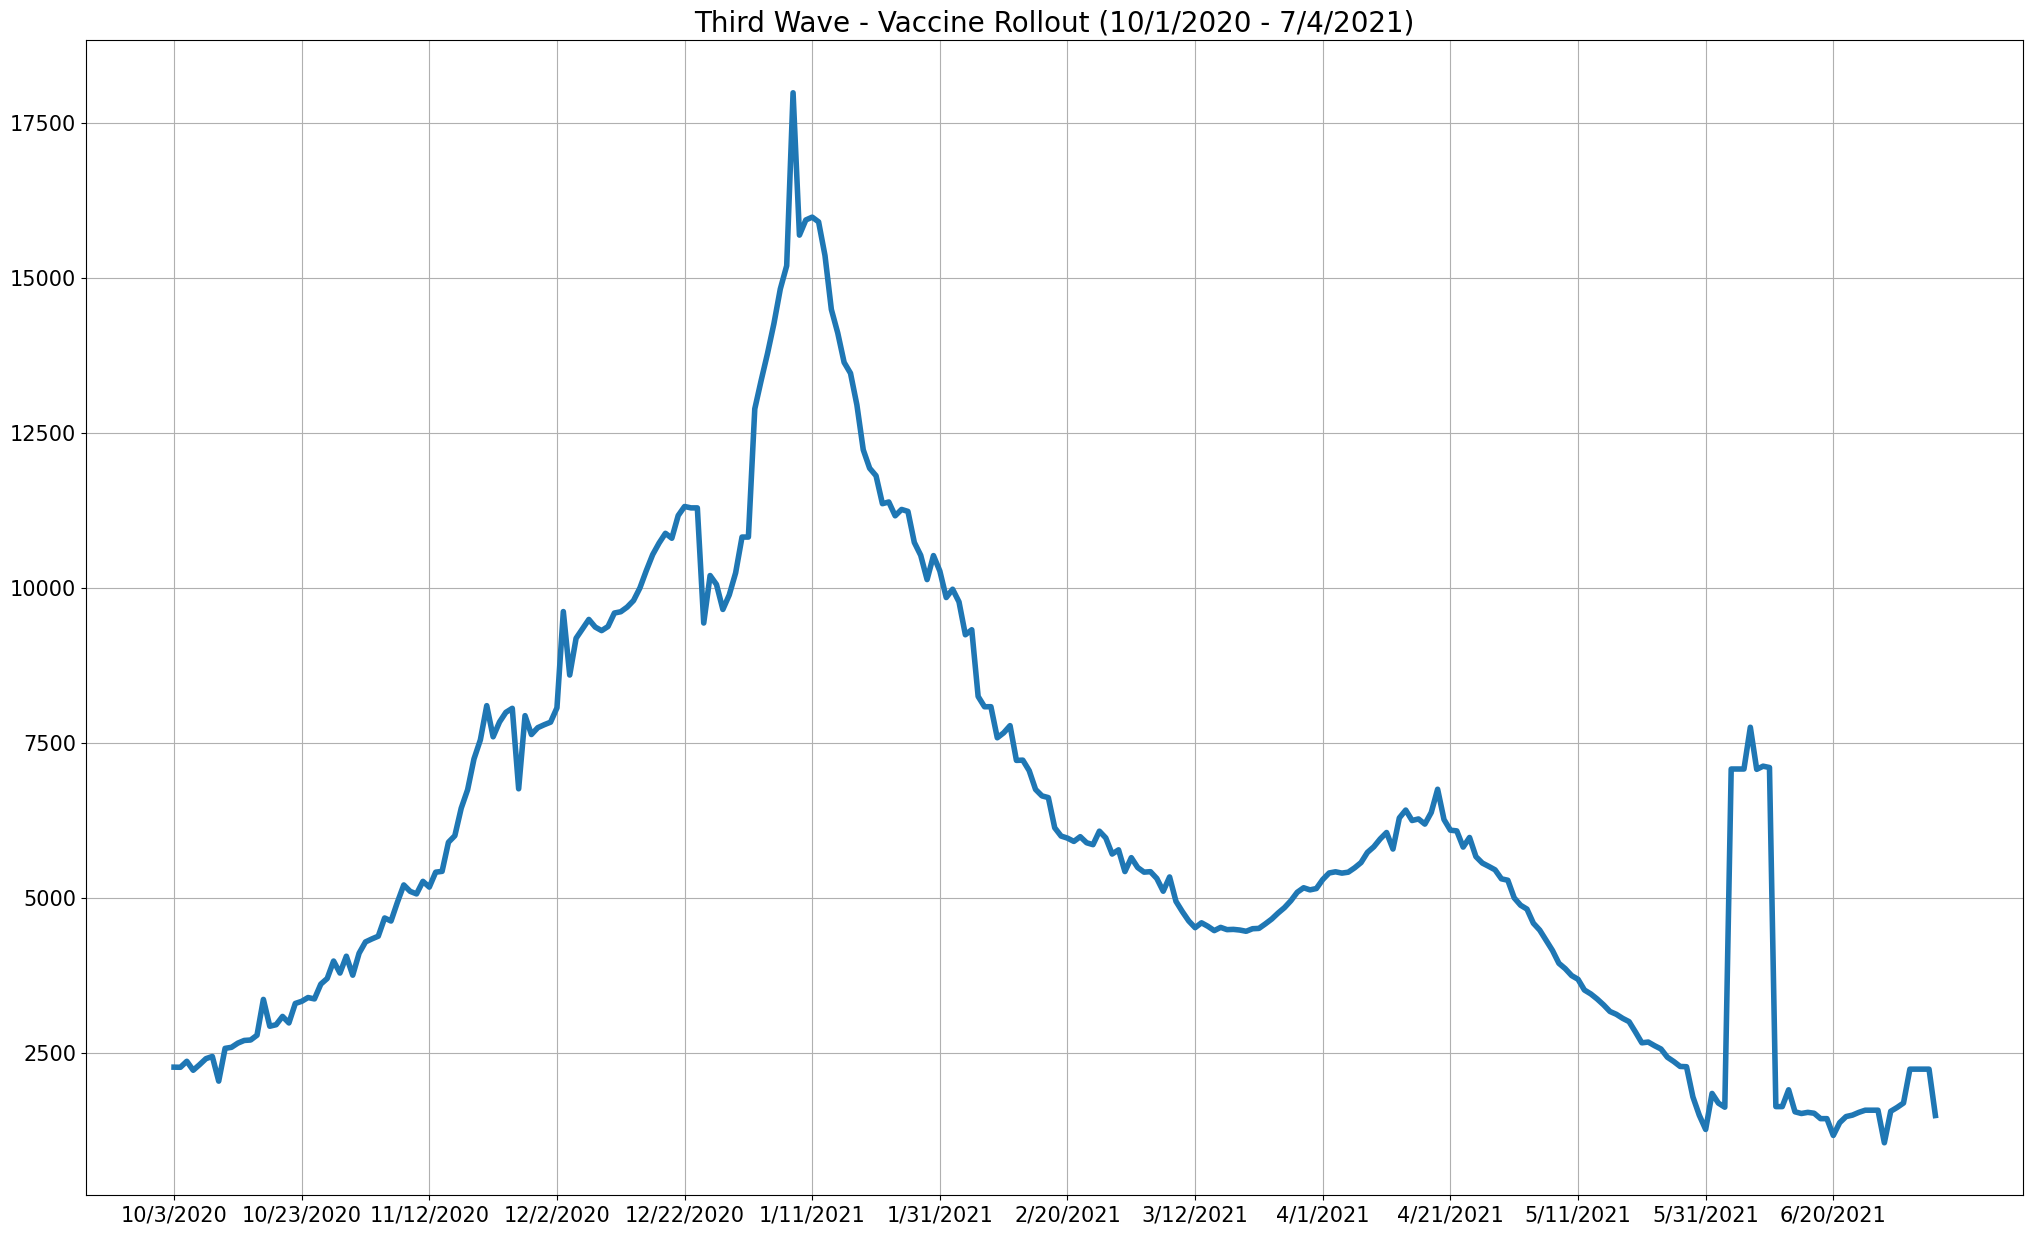

In [31]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)
third_wave = preprocessed_dataset.iloc[202:479]

plt.plot(third_wave["date"], third_wave["7_day_avg_inf"], linewidth=4)
plt.xticks(range(0, 277, 20), size = 15)  # show x-axis ticks every 10 values
plt.title("Third Wave - Vaccine Rollout (10/1/2020 - 7/4/2021)", size =20)
plt.yticks(size = 15)
plt.grid()

In [32]:
print(third_wave.columns.values)

third_wave_updated = third_wave.drop('date', axis=1)

# Apply Minmax normalization to each column
scaler = MinMaxScaler()
third_wave_up_norm = pd.DataFrame(scaler.fit_transform(third_wave_updated), columns=third_wave_updated.columns)

print(third_wave_up_norm.columns.values)

features_3 = ['RnR_Avg', 'GnP_Avg', 'Parks_Avg', 'Stations_Avg', 'Workplace_Avg',
            'Residential_Avg']

target_3 = ['7_day_avg_inf']

print(third_wave_up_norm.shape)

['date' 'RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
['RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
(277, 7)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(third_wave_up_norm.drop(target_3, axis=1), 
                                                    third_wave_up_norm[target_3], test_size=0.2, random_state=42)

In [34]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

mse_lr3 = mean_squared_error(y_test, lr_pred)
r2_lr3 = r2_score(y_test, lr_pred)

print('Mean squared error:', round(mse_lr3,3))
print('R-squared score:', round(r2_lr3,3))

Mean squared error: 0.013
R-squared score: 0.733


In [35]:
# Ridge Regression Model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse_ridge3 = mean_squared_error(y_test, ridge_pred)
r2_ridge3 = r2_score(y_test, ridge_pred)

print('Mean squared error:', round(mse_ridge3,3))
print('R-squared score:', round(r2_ridge3,3))

Mean squared error: 0.016
R-squared score: 0.667


In [36]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf3 = mean_squared_error(y_test, rf_pred)
r2_rf3 = r2_score(y_test, rf_pred)

print('Mean squared error:', round(mse_rf3,3))
print('R-squared score:', round(r2_rf3,3))

Mean squared error: 0.005
R-squared score: 0.904


C:\Users\asifi\AppData\Local\Temp\ipykernel_10040\1637331103.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [37]:
# Gradient Boosting Regression model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

mse_gb3 = mean_squared_error(y_test, gb_pred)
r2_gb3 = r2_score(y_test, gb_pred)

print('Mean squared error:', round(mse_gb3,3))
print('R-squared score:', round(r2_gb3,3))

Mean squared error: 0.006
R-squared score: 0.871


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# XGBoost Regression model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse_xgb3 = mean_squared_error(y_test, xgb_pred)
r2_xgb3 = r2_score(y_test, xgb_pred)

print('Mean squared error:', round(mse_xgb3,3))
print('R-squared score:', round(r2_xgb3,3))

Mean squared error: 0.003
R-squared score: 0.932


In [39]:
# Bagging Regressor
base_model = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test) 

mse_bg3 = mean_squared_error(y_test, bagging_pred)
r2_bg3 = r2_score(y_test, bagging_pred)

print('Mean squared error:', round(mse_bg3,3))
print('R-squared score:', round(r2_bg3,3))

Mean squared error: 0.005
R-squared score: 0.893


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [40]:
# AdaBoost Regressor
base_model = DecisionTreeRegressor()
adaboost = AdaBoostRegressor(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

mse_adaboost3 = mean_squared_error(y_test, adaboost_pred)
r2_adaboost3 = r2_score(y_test, adaboost_pred)

print('Mean squared error:', round(mse_adaboost3,3))
print('R-squared score:', round(r2_adaboost3,3))

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean squared error: 0.002
R-squared score: 0.956


In [41]:
models = pd.DataFrame({
    'Model' : ['AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regression',
               'Gradient Boosting Regression', 'Random Forest Regressor'],
    'MSE' : [mse_adaboost3, mse_bg3, mse_xgb3, mse_gb3, mse_rf3]})
models.sort_values(by = 'MSE', ascending=True)

,Model,MSE
0,AdaBoost Regressor,0.002110
2,XGBoost Regression,0.003250
4,Random Forest Regressor,0.004551
1,Bagging Regressor,0.005104
3,Gradient Boosting Regression,0.006147


#### Third Wave Parameter Hypertuning

In [42]:
Adaboost_fine_tuned = adaboost_ft(X_train, y_train, X_test, y_test)
XGBoost_fine_tuned = xgb_ft(X_train, y_train, X_test, y_test)
Gradient_boosting_fine_tuned = gb_ft(X_train, y_train, X_test, y_test)
Bagging_fine_tuned = bag_ft(X_train, y_train, X_test, y_test)
Random_forest_fine_tuned = rf_ft(X_train, y_train, X_test, y_test)

models_fine_tuned = pd.DataFrame({
    'Model' : ['AdaBoost Regressor_ft', 'Bagging Regressor_ft', 'XGBoost Regression_ft',
               'Gradient Boosting Regression_ft', 'Random Forest Regressor_ft'],
    'MSE' : [Adaboost_fine_tuned, Bagging_fine_tuned, XGBoost_fine_tuned, Gradient_boosting_fine_tuned, Random_forest_fine_tuned]})

print(models_fine_tuned.sort_values(by = 'MSE', ascending=True))
print(models.sort_values(by = 'MSE', ascending=True))

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Best parameters:  {'learning_rate': 1.0, 'n_estimators': 100}
XGBoost Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Best parameters:  {'n_estimators': 100}


e:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
                             Model       MSE
2            XGBoost Regression_ft  0.003326
4       Random Forest Regressor_ft  0.004311
1             Bagging Regressor_ft  0.004545
3  Gradient Boosting Regression_ft  0.004630
0            AdaBoost Regressor_ft  0.007671
                          Model       MSE
0            AdaBoost Regressor  0.002110
2            XGBoost Regression  0.003250
4       Random Forest Regressor  0.004551
1             Bagging Regressor  0.005104
3  Gradient Boosting Regression  0.006147


### Forth Wave (Delta Variant Surge) Analysis (7/5/2021 - 11/30/2022)

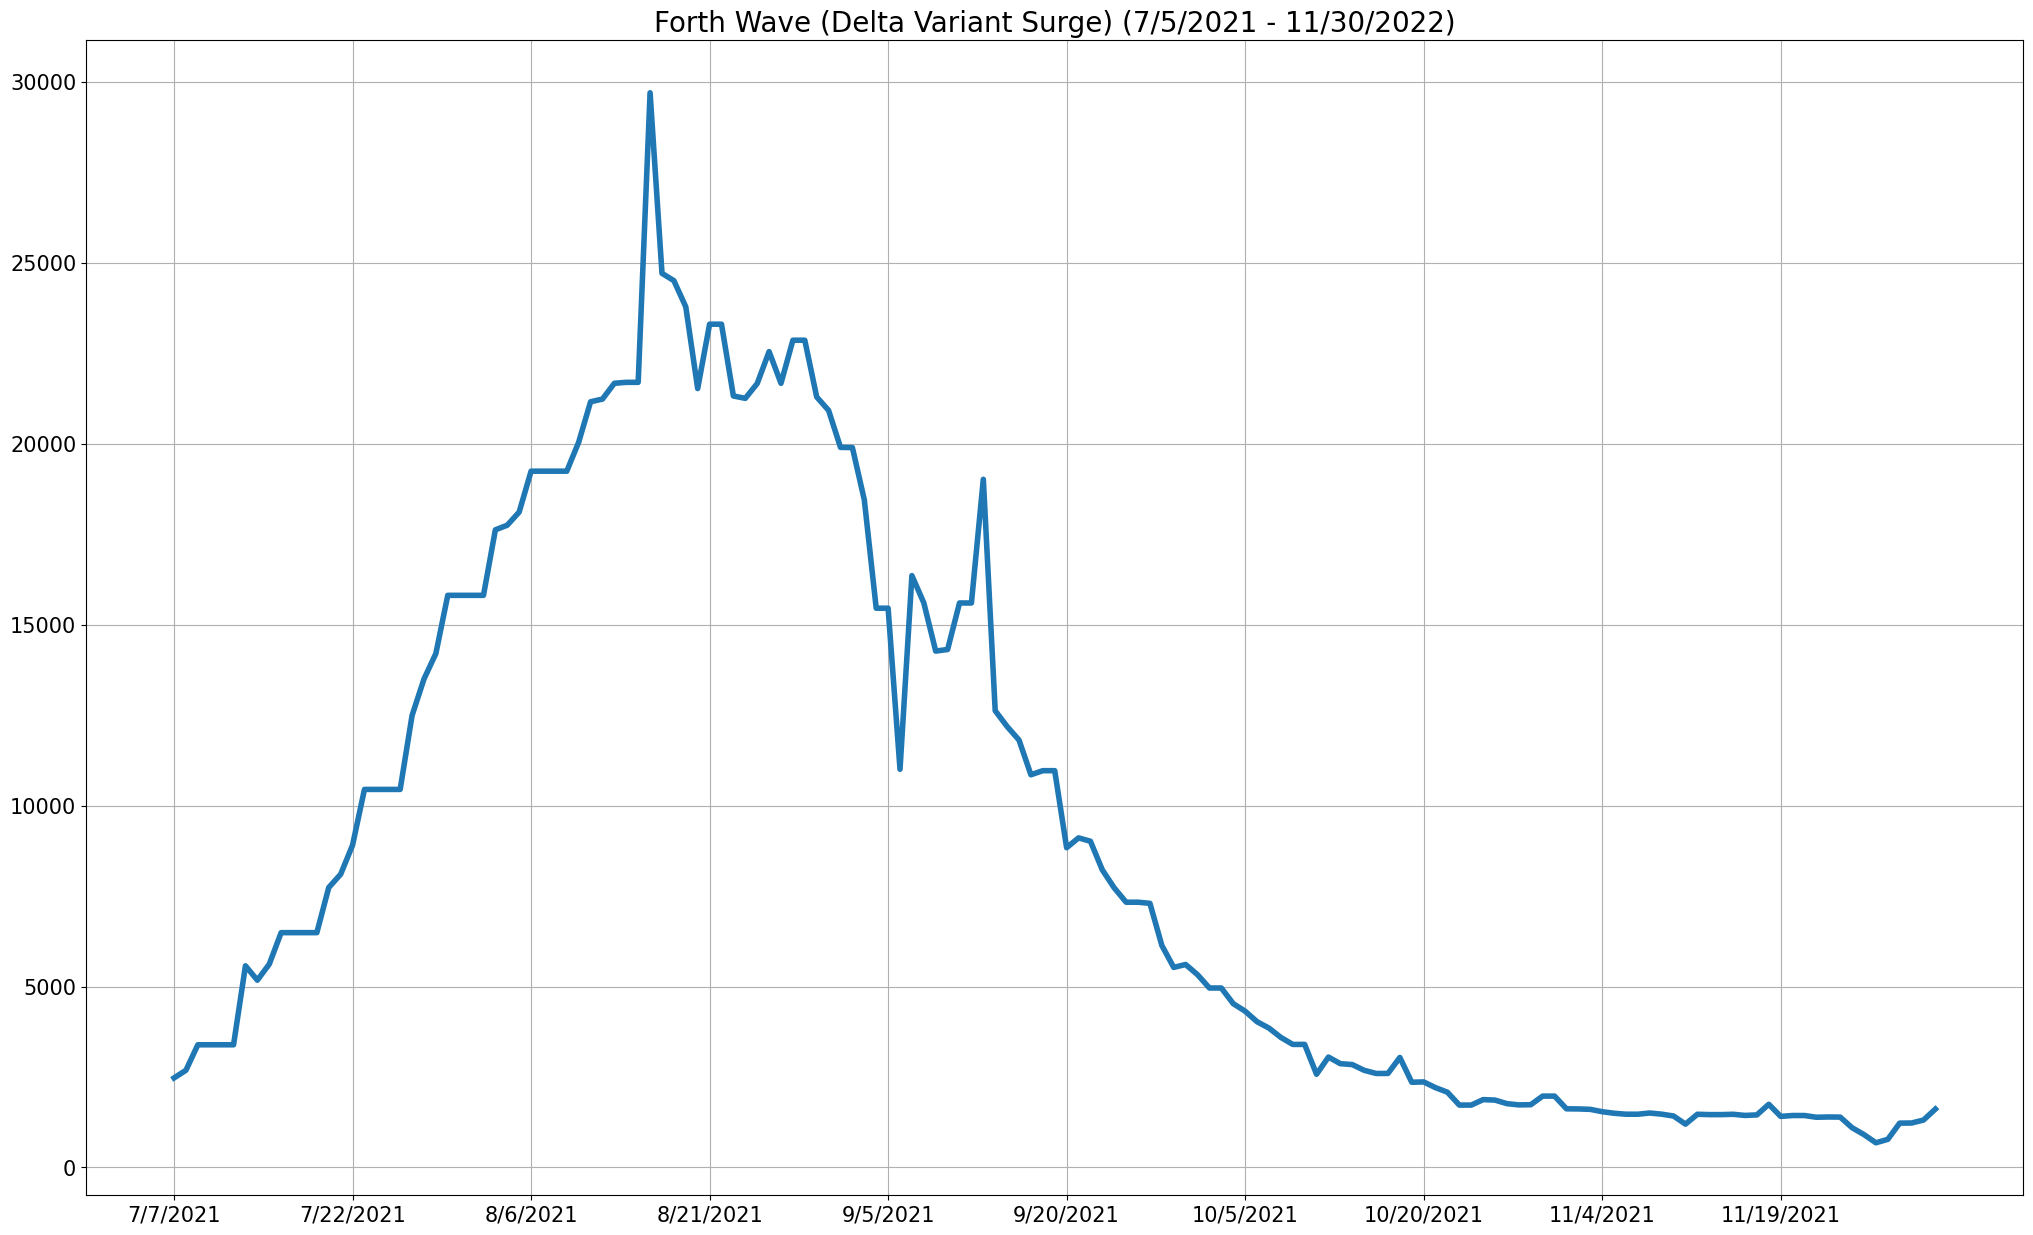

In [43]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)
forth_wave = preprocessed_dataset.iloc[479:628]

plt.plot(forth_wave["date"], forth_wave["7_day_avg_inf"], linewidth=4)
plt.xticks(range(0, 149, 15), size = 15)  # show x-axis ticks every 10 values
plt.title("Forth Wave (Delta Variant Surge) (7/5/2021 - 11/30/2022)", size = 20)
plt.yticks(size = 15)
plt.grid()

In [44]:
print(forth_wave.columns.values)

forth_wave_updated = forth_wave.drop('date', axis=1)

# Apply Minmax normalization to each column
scaler = MinMaxScaler()
forth_wave_up_norm = pd.DataFrame(scaler.fit_transform(forth_wave_updated), columns=forth_wave_updated.columns)

print(forth_wave_up_norm.columns.values)

features_4 = ['RnR_Avg', 'GnP_Avg', 'Parks_Avg', 'Stations_Avg', 'Workplace_Avg',
            'Residential_Avg']

target_4 = ['7_day_avg_inf']

print(forth_wave_up_norm.shape)

['date' 'RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
['RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
(149, 7)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(forth_wave_up_norm.drop(target_4, axis=1), 
                                                    forth_wave_up_norm[target_4], test_size=0.2, random_state=42)

In [46]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

mse_lr4 = mean_squared_error(y_test, lr_pred)
r2_lr4 = r2_score(y_test, lr_pred)

# print('Mean squared error:', round(mse_lr4,3))
# print('R-squared score:', round(r2_lr4,3))


# Ridge Regression Model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse_ridge4 = mean_squared_error(y_test, ridge_pred)
r2_ridge4 = r2_score(y_test, ridge_pred)

# print('Mean squared error:', round(mse_ridge4,3))
# print('R-squared score:', round(r2_ridge4,3))


# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf4 = mean_squared_error(y_test, rf_pred)
r2_rf4 = r2_score(y_test, rf_pred)

# print('Mean squared error:', round(mse_rf,3))
# print('R-squared score:', round(r2_rf,3))


# Gradient Boosting Regression model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

mse_gb4 = mean_squared_error(y_test, gb_pred)
r2_gb4 = r2_score(y_test, gb_pred)

# print('Mean squared error:', round(mse_gb,3))
# print('R-squared score:', round(r2_gb,3))


# XGBoost Regression model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse_xgb4 = mean_squared_error(y_test, xgb_pred)
r2_xgb4 = r2_score(y_test, xgb_pred)

# print('Mean squared error:', round(mse_xgb,3))
# print('R-squared score:', round(r2_xgb,3))


# Bagging Regressor
base_model = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test) 

mse_bg4 = mean_squared_error(y_test, bagging_pred)
r2_bg4 = r2_score(y_test, bagging_pred)

# print('Mean squared error:', round(mse_bg,3))
# print('R-squared score:', round(r2_bg,3))


# AdaBoost Regressor
base_model = DecisionTreeRegressor()
adaboost = AdaBoostRegressor(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

mse_adaboost4 = mean_squared_error(y_test, adaboost_pred)
r2_adaboost4 = r2_score(y_test, adaboost_pred)

# print('Mean squared error:', round(mse_adaboost,3))
# print('R-squared score:', round(r2_adaboost,3))

C:\Users\asifi\AppData\Local\Temp\ipykernel_10040\911311234.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143:

In [47]:
models = pd.DataFrame({
    'Model' : ['AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regression',
               'Gradient Boosting Regression', 'Random Forest Regressor'],
    'MSE' : [mse_adaboost4, mse_bg4, mse_xgb4, mse_gb4, mse_rf4]})
models.sort_values(by = 'MSE', ascending=True)

,Model,MSE
3,Gradient Boosting Regression,0.002136
2,XGBoost Regression,0.002278
0,AdaBoost Regressor,0.002905
4,Random Forest Regressor,0.003088
1,Bagging Regressor,0.006483


#### Fourth Wave Parameter Hypertuning

In [48]:
Adaboost_fine_tuned = adaboost_ft(X_train, y_train, X_test, y_test)
XGBoost_fine_tuned = xgb_ft(X_train, y_train, X_test, y_test)
Gradient_boosting_fine_tuned = gb_ft(X_train, y_train, X_test, y_test)
Bagging_fine_tuned = bag_ft(X_train, y_train, X_test, y_test)
Random_forest_fine_tuned = rf_ft(X_train, y_train, X_test, y_test)

models_fine_tuned = pd.DataFrame({
    'Model' : ['AdaBoost Regressor_ft', 'Bagging Regressor_ft', 'XGBoost Regression_ft',
               'Gradient Boosting Regression_ft', 'Random Forest Regressor_ft'],
    'MSE' : [Adaboost_fine_tuned, Bagging_fine_tuned, XGBoost_fine_tuned, Gradient_boosting_fine_tuned, Random_forest_fine_tuned]})

print(models_fine_tuned.sort_values(by = 'MSE', ascending=True))
print(models.sort_values(by = 'MSE', ascending=True))

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Best parameters:  {'learning_rate': 1.0, 'n_estimators': 200}
XGBoost Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Best parameters:  {'n_estimators': 10}
Random Forest Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
                             Model       MSE
3  Gradient Boosting Regression_ft  0.001818
2            XGBoost Regression_ft  0.002909
4       Random Forest Regressor_ft  0.003994
1             Bagging Regressor_ft  0.004432
0            AdaBoost Regressor_ft  0.004796
                          Model       MSE
3  Gradient Boosting Regression  0.002136
2            XGBoost Regression  0.002278
0            AdaBoost Regressor  0.002905
4       Random Forest Regressor  0.003088
1             Bagging Regressor  0.006483


e:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### Fifth Wave (Omicron Surge) Analysis (12/1/2021 - 2/28/2022)

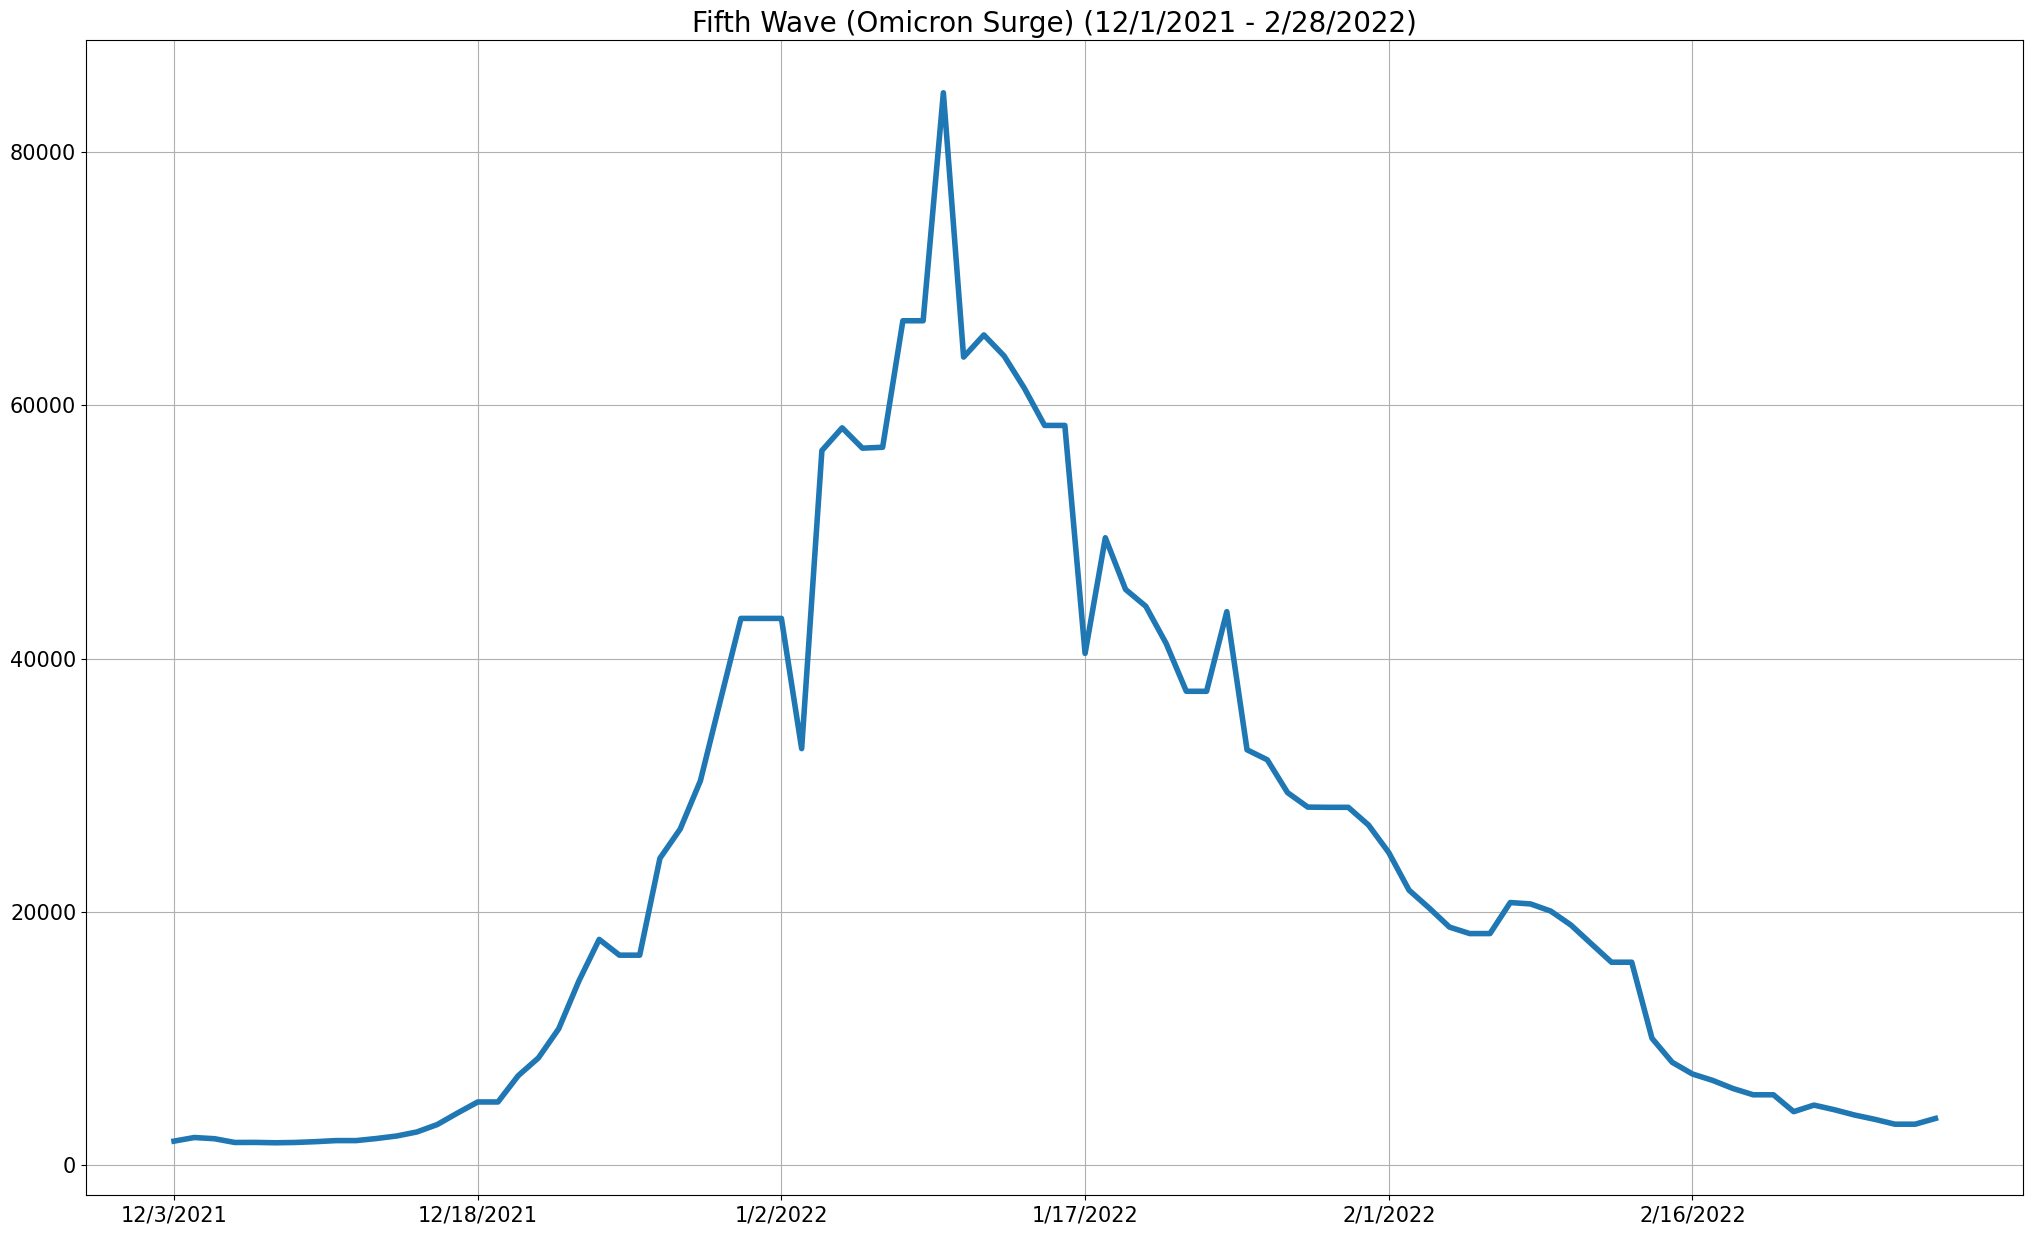

In [49]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)
fifth_wave = preprocessed_dataset.iloc[628:]

plt.plot(fifth_wave["date"], fifth_wave["7_day_avg_inf"], linewidth=4)
plt.xticks(range(0, 88, 15), size = 15)  # show x-axis ticks every 10 values
plt.title("Fifth Wave (Omicron Surge) (12/1/2021 - 2/28/2022)", size = 20)
plt.yticks(size = 15)
plt.grid()

In [50]:
print(fifth_wave.columns.values)

fifth_wave_updated = fifth_wave.drop('date', axis=1)

# Apply Minmax normalization to each column
scaler = MinMaxScaler()
fifth_wave_up_norm = pd.DataFrame(scaler.fit_transform(fifth_wave_updated), columns=fifth_wave_updated.columns)

print(fifth_wave_up_norm.columns.values)

features_5 = ['RnR_Avg', 'GnP_Avg', 'Parks_Avg', 'Stations_Avg', 'Workplace_Avg',
            'Residential_Avg']

target_5 = ['7_day_avg_inf']

print(fifth_wave_up_norm.shape)

['date' 'RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
['RnR_Avg' 'GnP_Avg' 'Parks_Avg' 'Stations_Avg' 'Workplace_Avg'
 'Residential_Avg' '7_day_avg_inf']
(88, 7)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(fifth_wave_up_norm.drop(target_5, axis=1), 
                                                    fifth_wave_up_norm[target_5], test_size=0.2, random_state=42)

In [52]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

mse_lr5 = mean_squared_error(y_test, lr_pred)
r2_lr5 = r2_score(y_test, lr_pred)

# print('Mean squared error:', round(mse_lr,3))
# print('R-squared score:', round(r2_lr,3))


# Ridge Regression Model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse_ridge5 = mean_squared_error(y_test, ridge_pred)
r2_ridge5 = r2_score(y_test, ridge_pred)

# print('Mean squared error:', round(mse_ridge,3))
# print('R-squared score:', round(r2_ridge,3))


# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf5 = mean_squared_error(y_test, rf_pred)
r2_rf5 = r2_score(y_test, rf_pred)

# print('Mean squared error:', round(mse_rf,3))
# print('R-squared score:', round(r2_rf,3))


# Gradient Boosting Regression model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

mse_gb5 = mean_squared_error(y_test, gb_pred)
r2_gb5 = r2_score(y_test, gb_pred)

# print('Mean squared error:', round(mse_gb,3))
# print('R-squared score:', round(r2_gb,3))


# XGBoost Regression model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse_xgb5 = mean_squared_error(y_test, xgb_pred)
r2_xgb5 = r2_score(y_test, xgb_pred)

# print('Mean squared error:', round(mse_xgb,3))
# print('R-squared score:', round(r2_xgb,3))


# Bagging Regressor
base_model = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test) 

mse_bg5 = mean_squared_error(y_test, bagging_pred)
r2_bg5 = r2_score(y_test, bagging_pred)

# print('Mean squared error:', round(mse_bg,3))
# print('R-squared score:', round(r2_bg,3))


# AdaBoost Regressor
base_model = DecisionTreeRegressor()
adaboost = AdaBoostRegressor(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

mse_adaboost5 = mean_squared_error(y_test, adaboost_pred)
r2_adaboost5 = r2_score(y_test, adaboost_pred)

# print('Mean squared error:', round(mse_adaboost,3))
# print('R-squared score:', round(r2_adaboost,3))

C:\Users\asifi\AppData\Local\Temp\ipykernel_10040\1545956944.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143

In [53]:
models = pd.DataFrame({
    'Model' : ['AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regression',
               'Gradient Boosting Regression', 'Random Forest Regressor'],
    'MSE' : [mse_adaboost5, mse_bg5, mse_xgb5, mse_gb5, mse_rf5]})
models.sort_values(by = 'MSE', ascending=True)

,Model,MSE
0,AdaBoost Regressor,0.001266
4,Random Forest Regressor,0.002242
1,Bagging Regressor,0.003147
3,Gradient Boosting Regression,0.003734
2,XGBoost Regression,0.004006


#### Fifth Wave Hyperparameter Tuning

In [54]:
Adaboost_fine_tuned = adaboost_ft(X_train, y_train, X_test, y_test)
XGBoost_fine_tuned = xgb_ft(X_train, y_train, X_test, y_test)
Gradient_boosting_fine_tuned = gb_ft(X_train, y_train, X_test, y_test)
Bagging_fine_tuned = bag_ft(X_train, y_train, X_test, y_test)
Random_forest_fine_tuned = rf_ft(X_train, y_train, X_test, y_test)

models_fine_tuned = pd.DataFrame({
    'Model' : ['AdaBoost Regressor_ft', 'Bagging Regressor_ft', 'XGBoost Regression_ft',
               'Gradient Boosting Regression_ft', 'Random Forest Regressor_ft'],
    'MSE' : [Adaboost_fine_tuned, Bagging_fine_tuned, XGBoost_fine_tuned, Gradient_boosting_fine_tuned, Random_forest_fine_tuned]})

print(models_fine_tuned.sort_values(by = 'MSE', ascending=True))
print(models.sort_values(by = 'MSE', ascending=True))

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Best parameters:  {'learning_rate': 0.1, 'n_estimators': 50}
XGBoost Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


e:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Best parameters:  {'n_estimators': 50}
Random Forest Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
                             Model       MSE
4       Random Forest Regressor_ft  0.002080
1             Bagging Regressor_ft  0.002346
0            AdaBoost Regressor_ft  0.003027
3  Gradient Boosting Regression_ft  0.005320
2            XGBoost Regression_ft  0.006248
                          Model       MSE
0            AdaBoost Regressor  0.001266
4       Random Forest Regressor  0.002242
1             Bagging Regressor  0.003147
3  Gradient Boosting Regression  0.003734
2            XGBoost Regression  0.004006


e:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
e:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
